In [1]:
import pandas as pd

/tmp/ipykernel_1475202/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = {
    'Gene': ['EXOC2', 'RHOH', 'RNASEH1', 'DNAJC7', 'PTCD3', 'ZNF423', 'OTUD7A', 'PRPH', 'BAZ2B', 'NDUFA2', 'TOP2B', 'HYAL1', 'FOXE3', 'AHCY'],
    'Rare Disease Papers': [8, 0, 7, 9, 2, 7, 7, 7, 5, 6, 6, 6, 13, 7],
    'Non-Rare Disease Papers': [7, 5, 13, 4, 4, 11, 3, 10, 11, 3, 14, 22, 2, 12],
    'Other Papers': [35, 45, 30, 30, 12, 29, 17, 31, 34, 29, 30, 21, 29, 31],
    'Tool Correct': [1, 1, 1, 7, 2, 2, 2, 3, 3, 2, 3, 1, 6, 3],
    'Tool Missed': [0, 0, 4, 1, 1, 2, 0, 5, 6, 2, 4, 2, 12, 14],
    'Tool Extra': [7, 49, 6, 2, 0, 5, 5, 4, 2, 4, 3, 5, 7, 4],
    'PubMed Correct': [1, 1, 5, 8, 3, 4, 2, 5, 3, 3, 4, 3, 9, 6],
    'PubMed Missed': [0, 0, 0, 0, 0, 0, 0, 3, 6, 1, 3, 0, 9, 11],
    'PubMed Extra': [49, 49, 45, 35, 15, 43, 25, 43, 47, 35, 46, 46, 35, 44]
}

df = pd.DataFrame(data)


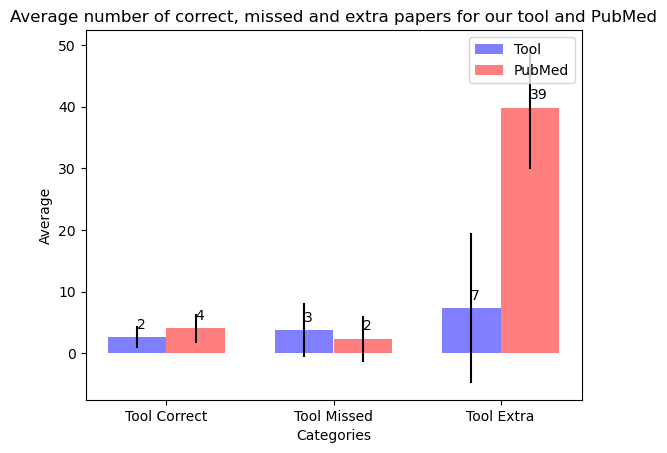

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate averages
tool_averages = df[['Tool Correct', 'Tool Missed', 'Tool Extra']].mean()
pubmed_averages = df[['PubMed Correct', 'PubMed Missed', 'PubMed Extra']].mean()

# Calculate standard deviations
tool_std = df[['Tool Correct', 'Tool Missed', 'Tool Extra']].std()
pubmed_std = df[['PubMed Correct', 'PubMed Missed', 'PubMed Extra']].std()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define bar width
bar_width = 0.35

# Positions of the left bar boundaries
bar_l = np.arange(len(tool_averages))

# Positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i + (bar_width / 2) for i in bar_l]

# Create a bar plot for 'Tool'
tool_bars = ax.bar(bar_l, 
       # using the 'Tool' data
       tool_averages, 
       # set the width
       width = bar_width,
       # with the label 'Tool'
       label = 'Tool', 
       # with alpha 0.5
       alpha = 0.5, 
       # with color
       color = 'b',
       # with error
       yerr = tool_std)

# Create a bar plot for 'PubMed'
pubmed_bars = ax.bar(bar_l + bar_width, 
       # using the 'PubMed' data
       pubmed_averages, 
       # set the width
       width = bar_width,
       # with the label 'PubMed'
       label = 'PubMed', 
       # with alpha 0.5
       alpha = 0.5, 
       # with color
       color = 'r',
       # with error
       yerr = pubmed_std)

# Set the ticks to be first names
plt.xticks(tick_pos, tool_averages.index)
ax.set_ylabel("Average")
ax.set_xlabel("Categories")
plt.legend(loc='upper right')
plt.title("Average number of correct, missed and extra papers for our tool and PubMed")

# Function to add labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height + 0.9,
                '%d' % int(height),
                ha='left', va='bottom')

# Call the function for each barplot
add_labels(tool_bars)
add_labels(pubmed_bars)

# Let's display the plot
plt.show()


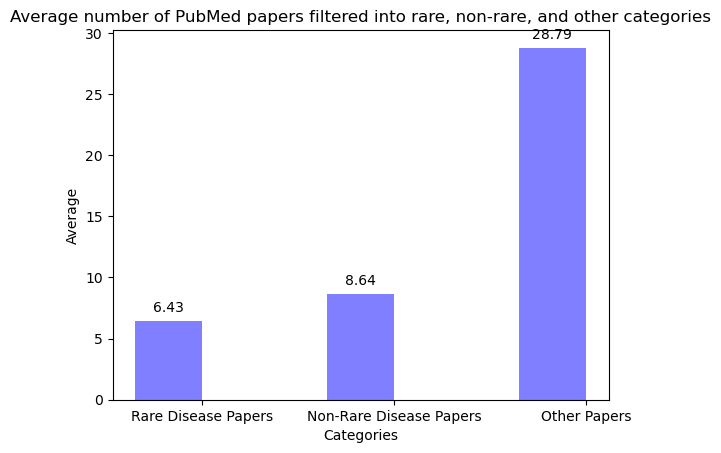

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate averages
rare_disease_avg = df['Rare Disease Papers'].mean()
non_rare_disease_avg = df['Non-Rare Disease Papers'].mean()
other_papers_avg = df['Other Papers'].mean()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define bar width
bar_width = 0.35

# Positions of the left bar boundaries
bar_l = np.arange(3)

# Positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i + (bar_width / 2) for i in bar_l]

# Create a bar plot
bars = ax.bar(bar_l, 
       # using the data
       [rare_disease_avg, non_rare_disease_avg, other_papers_avg], 
       # set the width
       width = bar_width,
       # with alpha 0.5
       alpha = 0.5, 
       # with color
       color = 'b')

# Set the ticks to be first names
plt.xticks(tick_pos, ['Rare Disease Papers', 'Non-Rare Disease Papers', 'Other Papers'])
ax.set_ylabel("Average")
ax.set_xlabel("Categories")
plt.title("Average # PubMed papers filtered into rare, non-rare, and other categories")
# Function to add labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height + 0.5,
                '%.2f' % float(height),
                ha='center', va='bottom')

# Call the function for each barplot
add_labels(bars)

# Let's display the plot
plt.show()
